### Feature Selection-Information gain - mutual information In Regression Problem Statements

**Mutual Information**

Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [2]:
df = pd.read_csv("house_price.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
numeric_list = df.dtypes[(df.dtypes == "int64" )|(df.dtypes == "float64" )]
numeric_list

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [7]:
df = df[numeric_list.index]

In [8]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
df.drop("Id",axis=1,inplace=True)

In [10]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
X_train.shape,X_test.shape

((1022, 36), (438, 36))

In [14]:
mi = mutual_info_regression(X_train.fillna(0),y_train)
mi

array([2.58918395e-01, 2.12703544e-01, 1.65543348e-01, 5.29357256e-01,
       1.14059427e-01, 3.51273163e-01, 2.37764979e-01, 9.52517277e-02,
       1.62845243e-01, 8.47522461e-03, 1.11085253e-01, 3.80998412e-01,
       3.12143902e-01, 2.35120596e-01, 2.33600558e-03, 4.80128261e-01,
       2.16445167e-02, 4.98100781e-04, 2.64111664e-01, 8.82333028e-02,
       5.83618561e-02, 1.19868166e-02, 1.78916627e-01, 1.80056012e-01,
       2.68294155e-01, 3.74200893e-01, 3.64381861e-01, 5.91213410e-02,
       1.75372024e-01, 1.42341988e-02, 0.00000000e+00, 2.37057047e-02,
       0.00000000e+00, 8.64239373e-03, 0.00000000e+00, 0.00000000e+00])

In [15]:
mi = pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.529357
GrLivArea        0.480128
TotalBsmtSF      0.380998
GarageCars       0.374201
GarageArea       0.364382
YearBuilt        0.351273
1stFlrSF         0.312144
GarageYrBlt      0.268294
FullBath         0.264112
MSSubClass       0.258918
YearRemodAdd     0.237765
2ndFlrSF         0.235121
LotFrontage      0.212704
Fireplaces       0.180056
TotRmsAbvGrd     0.178917
OpenPorchSF      0.175372
LotArea          0.165543
BsmtFinSF1       0.162845
OverallCond      0.114059
BsmtUnfSF        0.111085
MasVnrArea       0.095252
HalfBath         0.088233
WoodDeckSF       0.059121
BedroomAbvGr     0.058362
ScreenPorch      0.023706
BsmtFullBath     0.021645
EnclosedPorch    0.014234
KitchenAbvGr     0.011987
MiscVal          0.008642
BsmtFinSF2       0.008475
LowQualFinSF     0.002336
BsmtHalfBath     0.000498
MoSold           0.000000
3SsnPorch        0.000000
PoolArea         0.000000
YrSold           0.000000
dtype: float64

<AxesSubplot:>

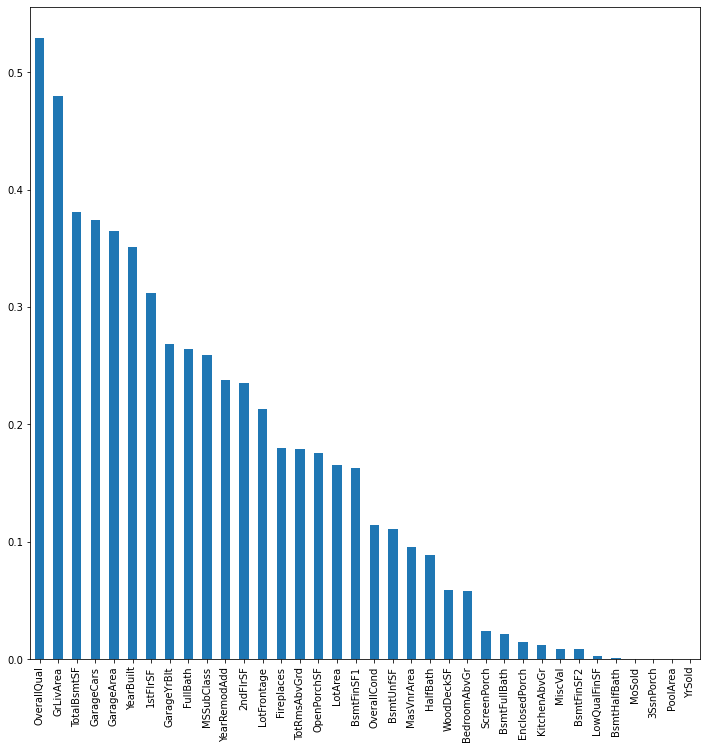

In [16]:
mi.sort_values(ascending=False).plot(kind="bar",figsize=(12,12))

In [17]:
sel_five_columns = SelectKBest(mutual_info_regression,k=5)
sel_five_columns.fit(X_train.fillna(0),y_train)
X_train.columns[sel_five_columns.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [18]:
sel_ten_columns = SelectPercentile(mutual_info_regression,percentile=20)
sel_ten_columns.fit(X_train.fillna(0),y_train)
X_train.columns[sel_ten_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

**Difference Between Information Gain And Mutual Information**

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.